# CBE 562 Homework 5

#### Tyson Wheelwright

The Arrhenius law establishes an explicit dependency between a reaction rate constant and temperature
and has the following form:
k = A * exp(\frac{-E_a}{R*T})
Here, k (in 1/sec) is the reaction rate constant, A is known as the pre-exponential factor, Ea is the activation
energy, T is temperature, and R is the universal gas constant (in 8.314 J/mol · K).
The activation energy and pre-exponential factor for a given reaction can be estimated by performing
experiments. For instance, one typically runs a reaction in a batch reactor (at a given temperature) and
keeps track of concentration of a reactant or product. One then uses the concentration data to determine
the reaction rate and associated constant k. Determining the rate constant is a complicated procedure and
contains inherent variability; as such, it is often necessary to ensure reproducibility by running the experiment at the same temperature multiple times.
You have conducted experiments at 4 different temperatures (10 experiments per temperature). The
outcomes of the experiments are recorded in arrhenius_data.dat (1st column is the reaction rate constant
and 2nd column is temperature).
1. Determine the maximum likelihood estimate for the parameters of your model and determine the
variance of the noise model that captures the variability of the measurements for k.
2. Determine if the parameters can be estimated uniquely from the available data.
3. Compare the data against the model predictions (using a k vs T plot). What can you conclude from
this?
4. Determine the coefficient of determination (R2 Value) and determine if the residuals are Gaussian. What can you
conclude from this?
5. Determine the precision of the parameter estimates (their standard deviations). What can you conclude
from this?
6. Determine the Fisher information and its eigenvalues. What can you conclude from this?

## Problem 1

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import cumtrapz
import seaborn as sns
from scipy.optimize import minimize

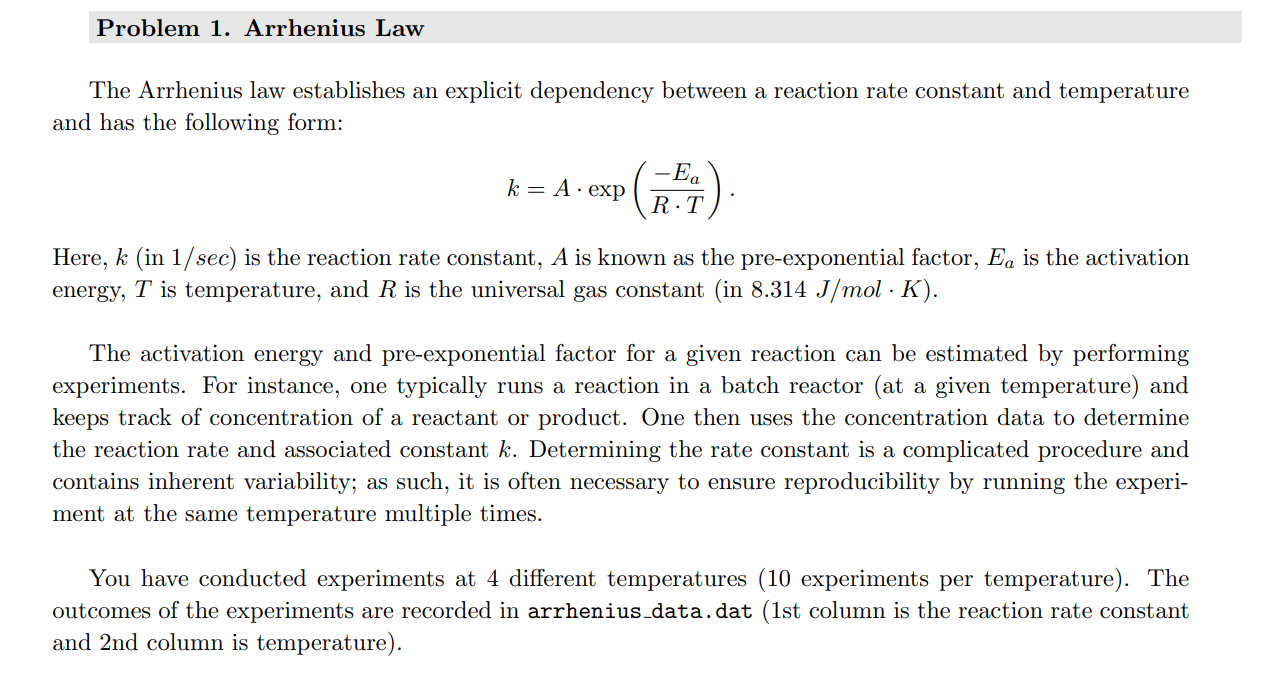

In [6]:
df = pd.read_csv('../Matlab/Data/arrhenius_data.dat', delimiter='\s+', header=None, names=['rxn_rate', 'temp'])

# Function to calculate the negative log-likelihood
def neg_log_likelihood(params, data):
    A, Ea, sigma = params
    k_observed = data['rxn_rate']
    T = data['temp']
    k_predicted = A * np.exp(-Ea / (8.314 * T))
    likelihood = -0.5 * np.sum(np.log(2 * np.pi * sigma**2) + ((k_observed - k_predicted) / sigma)**2)
    return -likelihood

# Read data
df = pd.read_csv('../Matlab/Data/arrhenius_data.dat', delimiter='\s+', header=None, names=['rxn_rate', 'temp'])

# Initial guess for parameters
initial_params = [1.0, 50.0, 0.1]  # A, Ea, sigma

# Perform MLE
result = minimize(neg_log_likelihood, initial_params, args=(df,), method='L-BFGS-B')

# Extract the estimated parameters
A_est, Ea_est, sigma_est = result.x

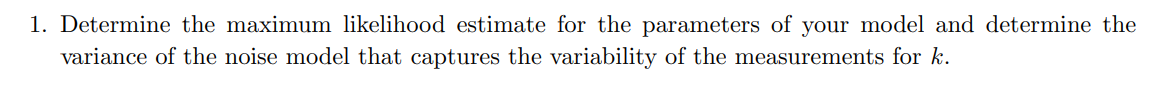

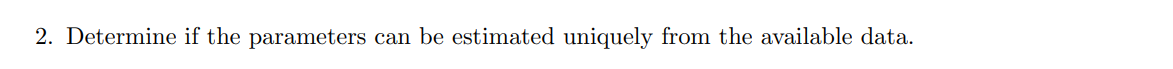

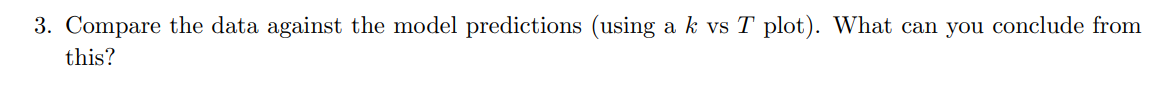

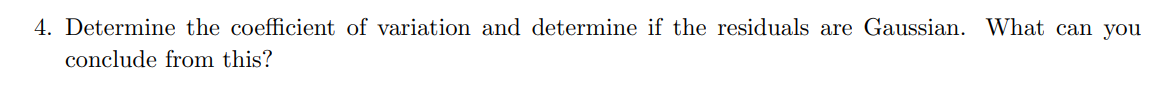

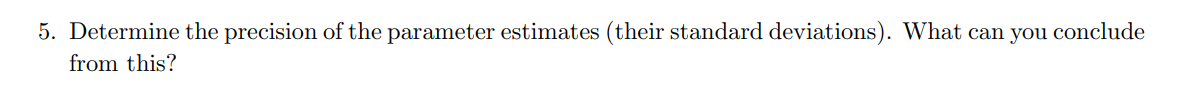

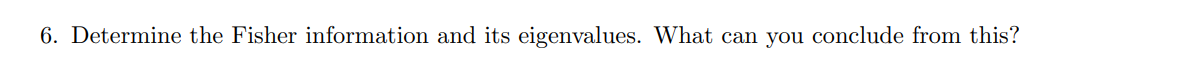

## Problem 2

Humans generate significant amounts of CO2 through respiration; if an occupied space is not properly
ventilated, the generated CO2 will accumulate and the air can reach harmful concentration levels that affect
health (e.g, affect cognitive activity). Monitoring and controlling CO2 levels in highly occupied spaces such
as office buildings and schools is important.
The dynamics of the CO2 concentration in a classroom can be described by a CSTR model of the form:
\frac{dC(t)}{dt}= \frac{Q}{V}(C_{in}-C(t))+ \frac{G}{V}n_{oc}
where C(t) is the CO2 concentration in [ppm], t is time in [min], Q is the airflow rate in [cfm]=[ft^3/min]
C_{in} = 400 is the CO2 concentration in the fresh airflow in [ppm], V = 10000 is the classroom volume in [cf] = [ft^3], 
G is the CO2 generation rate per occupant in [ppm − cf /min], and n_{oc} = 40 is the number of
occupants in the classroom. All the units in the model are consistent.
The American Society of Heating, Refrigerating, and Air-Conditioning Engineers (ASHRAE) recommends that a minimum ventilation flow rate of 8 cfm per occupant should be maintained at all times.
Unfortunately, there is no flow sensor in the classroom to validate this and thus the flow rate needs to
be estimated from data. Moreover, the CO2 generation rate per occupant is difficult to determine from
first-principles (depends on many factors such as age, metabolic rate, activity level) and thus we would like
to determine it directly from data.
To estimate the ventilation flow rate and generation rate, you have set up the following experiment.
You begin with a an empty classroom 400 ppm (atmospheric conditions) and start recording the CO2
concentration after the students come into the classroom. You record the concentration every ∆t =5 min
for one hour (total of N = 13 sampling times) and approximate your model using the discrete-time form:
\frac{C_{k+1}-C_k}{\Delta t}= \frac{Q}{V}(C_{in}-C_k) + \frac{G}{V}n_{oc}, k = 0, ..., n-1
where Ck is the observed CO2 concentration at time k·∆t. The recorded data is available at co2_classroom_data.dat
(1st column is time and 2nd column is concentration).
1. Use the discrete-time model to estimate the flow rate and the generation rate per occupant in the
classroom.
2. Compare the model predictions against the concentration data. Use a plot of concentration vs. time
for this. What can you conclude from this?
3. Determine whether the flow rate per occupant satisfies the requirements of ASHRAE.
4. Determine whether the flow rate and generation rate can be estimated uniquely from the available
data.


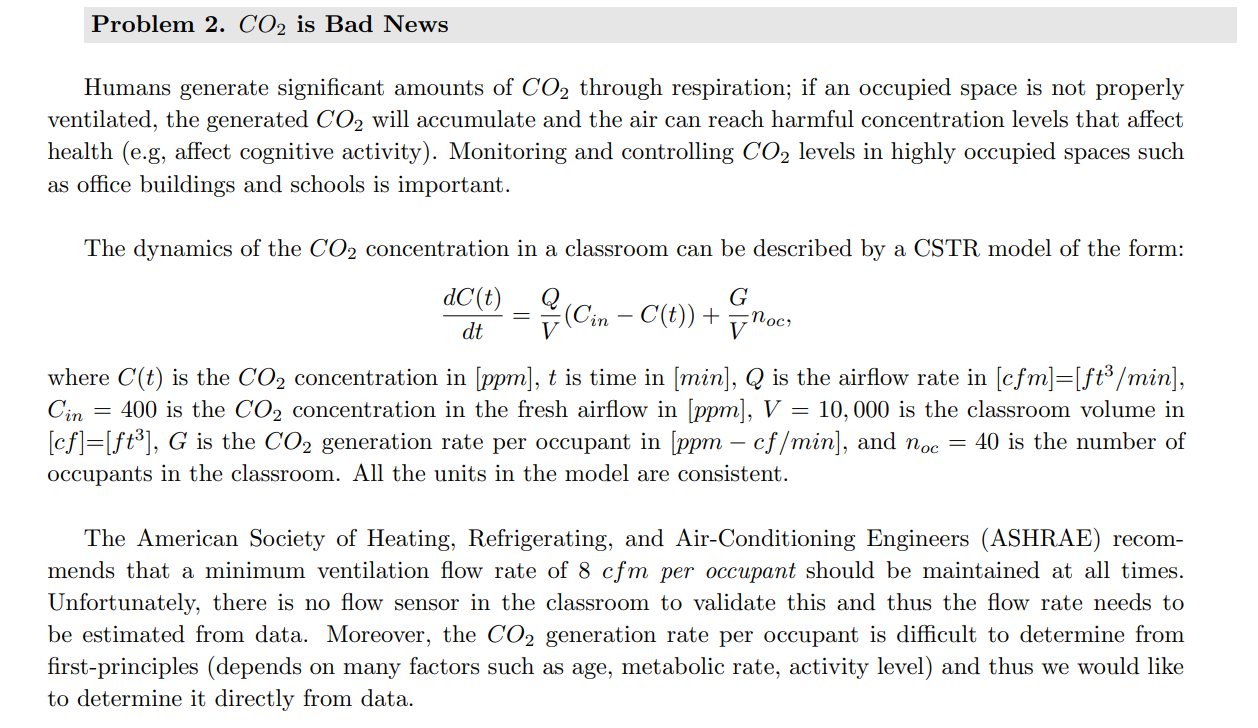

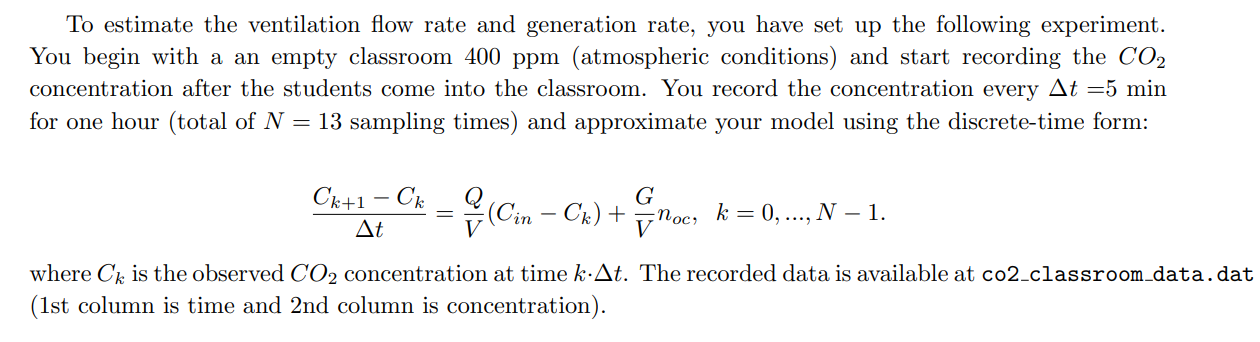